<a href="https://colab.research.google.com/github/xuany823/ADS505_Final_Project/blob/Michelle's-branch/Spotify_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# !git clone https://github.com/xuany823/ADS505_Final_Project.git
# %cd ADS505_Final_Project
# Run it if you haven't. You'll be permanently set for our collaborative environment.

In [83]:
# Data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Viz
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Sklearn
from sklearn import model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegressionCV
# Michael

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Feature selection

# Models
import xgboost as xgb
#import lightgbm as lgb
from sklearn import linear_model, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# dmba
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary

# # Remove warnings
import warnings
# warnings.filterwarnings('ignore')

# Setup & Data loading

In [ ]:
# Clone from our repo into Colab
!git clone https://github.com/xuany823/ADS505_Final_Project.git
%cd ADS505_Final_Project

data_path = "Datasets/"

df = pd.read_csv(f"{data_path}spotify_churn_dataset.csv")


Cloning into 'ADS505_Final_Project'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 75 (delta 33), reused 27 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 4.24 MiB | 28.37 MiB/s, done.
Resolving deltas: 100% (33/33), done.
/content/ADS505_Final_Project/ADS505_Final_Project/ADS505_Final_Project/ADS505_Final_Project


## Data Preparation

In [ ]:
# Quick check
print(df.shape)

(8000, 12)


In [ ]:
# Quick preview of the df

df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
# More preview of the df

df.sample(10).T

,2168,4309,7315,164,5887,5149,6398,2387,5054,1959
user_id,2169,4310,7316,165,5888,5150,6399,2388,5055,1960
gender,Female,Female,Male,Male,Female,Other,Male,Male,Male,Female
age,51,59,52,20,38,44,48,53,39,24
country,UK,FR,IN,DE,AU,US,DE,IN,FR,UK
subscription_type,Student,Premium,Free,Family,Family,Student,Free,Student,Family,Student
listening_time,114,25,126,224,185,194,278,44,204,192
songs_played_per_day,56,41,23,51,2,17,34,64,48,98
skip_rate,0.36,0.42,0.42,0.23,0.05,0.49,0.09,0.35,0.36,0.44
device_type,Desktop,Mobile,Desktop,Desktop,Mobile,Desktop,Mobile,Desktop,Web,Desktop
ads_listened_per_week,0,0,43,0,0,0,13,0,0,0


In [ ]:
# Get some basic information of the df, including data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [ ]:
df.isna().sum() # Checking for missing values

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


In [ ]:
# Drop user_id column, as it would not be meaningful in the modeling

df = df.drop(columns=['user_id'])

In [ ]:
# Getting some basic statistics for the variables

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,8000,3,Male,2691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,8000.0,NaN,NaN,NaN,37.662125,12.740359,16.0,26.0,38.0,49.0,59.0
country,8000,8,AU,1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscription_type,8000,4,Premium,2115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listening_time,8000.0,NaN,NaN,NaN,154.06825,84.015596,10.0,81.0,154.0,227.0,299.0
songs_played_per_day,8000.0,NaN,NaN,NaN,50.12725,28.449762,1.0,25.0,50.0,75.0,99.0
skip_rate,8000.0,NaN,NaN,NaN,0.300127,0.173594,0.0,0.15,0.3,0.45,0.6
device_type,8000,3,Desktop,2778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ads_listened_per_week,8000.0,NaN,NaN,NaN,6.943875,13.617953,0.0,0.0,0.0,5.0,49.0
offline_listening,8000.0,NaN,NaN,NaN,0.74775,0.434331,0.0,0.0,1.0,1.0,1.0


Summary of basic dataset information:
1.   Gender, country, subscription_type, and device_type are categorical data type in the df.
2.  is_churned was the outcome variable.
3.   user_id was not needed, because it provided no meaningful information for analysis.
4.   There were no missing values in the dataset.
5.   user_id column was dropped, because it would not be needed in below processes,
including EDA, preprocessing, and modeling.






# EDA

## Distribution of numeric variables

About 74% of Spotify users did not churn, while about 26% did churn, indicating class imbalance in the target variable

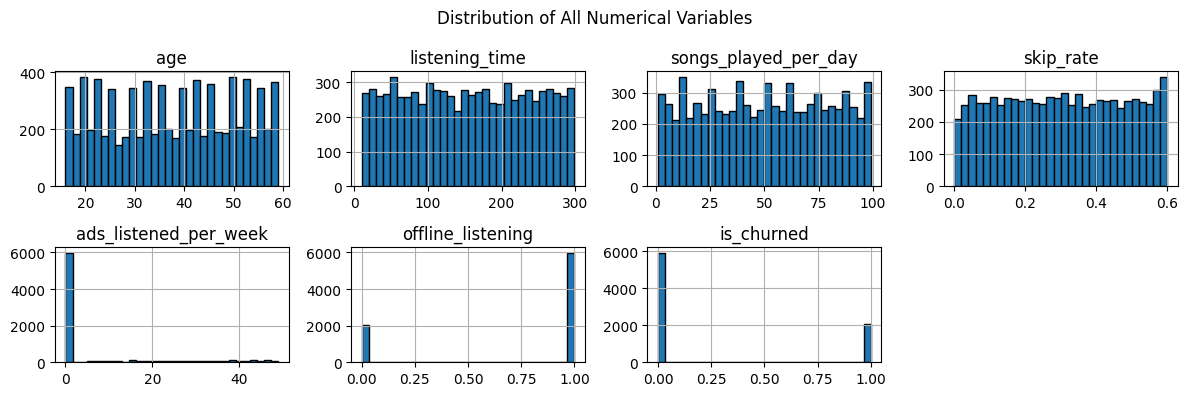

In [ ]:
# Distribution of numerical variables

df.hist(figsize=(12, 4), bins=30, edgecolor='black', layout=(2, 4)) # Michelle
plt.suptitle('Distribution of All Numerical Variables')
plt.tight_layout()
plt.show()


Michelle
1.   Age, listening time, songs played per day, and skip rate spread fairly evenly accross their own range.
2.   Ads listened per week is highly skewed toward zero.
3.   Offline listening and is_churned are binary, concentrated at 0 and 1.



1. Age were evenly distributed among the users, besides four modes at age bins around 15, 30, 45, and 60, indicating there were a slightly more users concentrated in these bins.

2. For listening_time, songs_played_per_day, and skip rate, they were pretty evenly distributed throughout their bins.

3. ads_listened_per_week indicated most people listened to 0 - 5 ads per week.

4. For offiline_listening, 3/4 of the users had used it, while 1/4 hadn't used it.  

## Correlation matrix



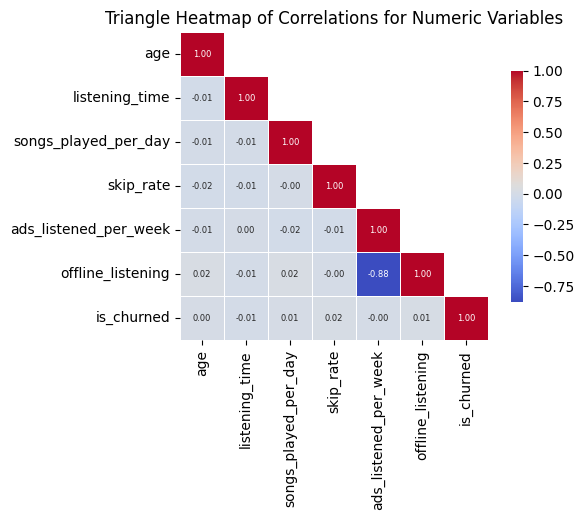

In [ ]:
# Correlation heatmap for the numeric variables
corr = df.corr(numeric_only=True)

# Create a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# heatmap
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True,
            square=True, linewidths=0.5, annot_kws={"size": 6},
            fmt=".2f", cbar_kws={"shrink": 0.75})

plt.title("Triangle Heatmap of Correlations for Numeric Variables")
plt.show()

Michelle:
1. Most variables show very weak correlations with each other and with churn.
2. The strongest relationship is a strong negative correlation (-0.88) between ads_listened_per_week and offline_listening, they capture opposite user behaviors(assuming users who listen offline are less exposed to ads.) .

1. offline_listening and ads_listened_per_week had strong negative linear relationship with a correlation coefficient of -0.88, suggesting that users who listened offline would often listen to less ads per week. This makes sense, because ads probably not be able to be played offline in Spotify.

2. There were no other obvious linear relationships between the other numeric variables, because their r's were around 0.



## Distribution of categorical variables

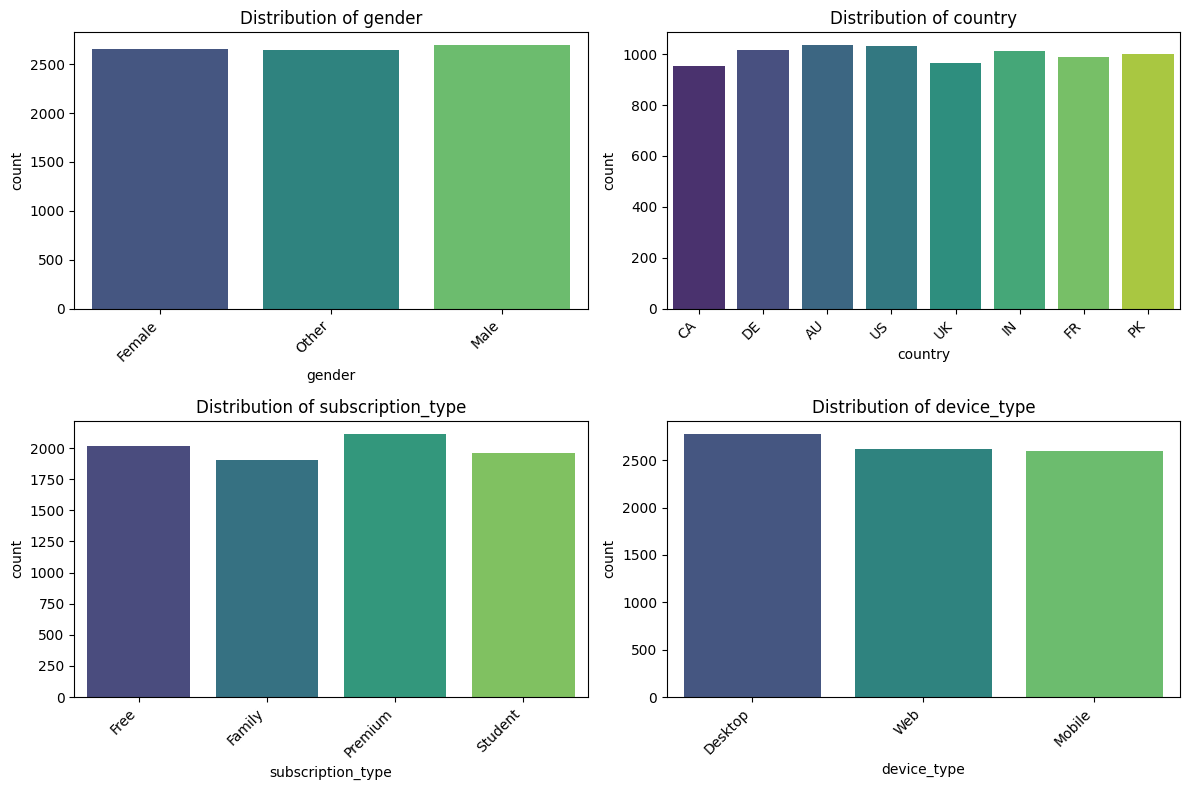

In [ ]:
# Count plots for the categorical variables

plt.figure(figsize=(12, 8))

categorical_columns = ['gender', 'country', 'subscription_type', 'device_type']

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The number in each categories of gender, country, subscription_type, and device_type were mostly evenly distributed.

Most users were males.

Most users were from Australia.

Most users had a premium subscription.

Most users used destop to listen to Spotify.

## Count plot is_churned vs non churn

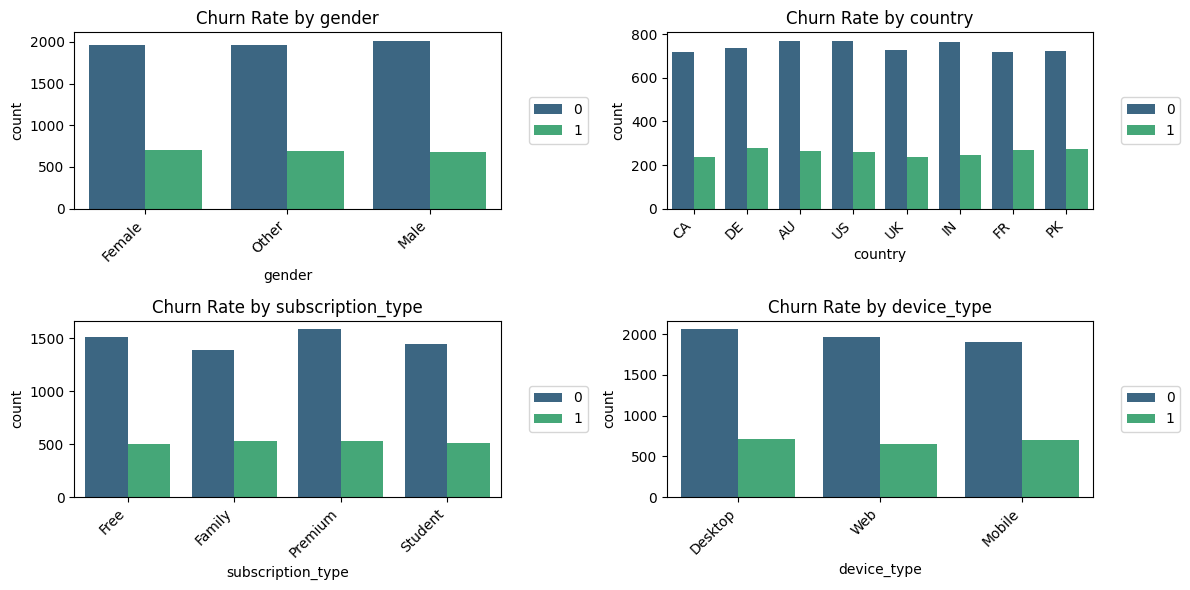

In [ ]:
# Count plots for categorical variables vs is_churned

categorical_columns_vs_churn = ['gender', 'country', 'subscription_type', 'device_type', ]

plt.figure(figsize=(12, 6))

for i, col in enumerate(categorical_columns_vs_churn, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, hue='is_churned', palette='viridis')
    plt.title(f'Churn Rate by {col}')
    plt.legend(loc="center left", bbox_to_anchor=(1.05, 0.5)) # Michelle
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The churn rates were similar among the categories of gender, country, subscription_type, and device_type.

For example:

1/4 of the male users churned.

1/4 of the Australian users churned.

1/4 of the premium users churned.

1/4 of the desktop users churned.

## Box plot of is_churn vs non churn

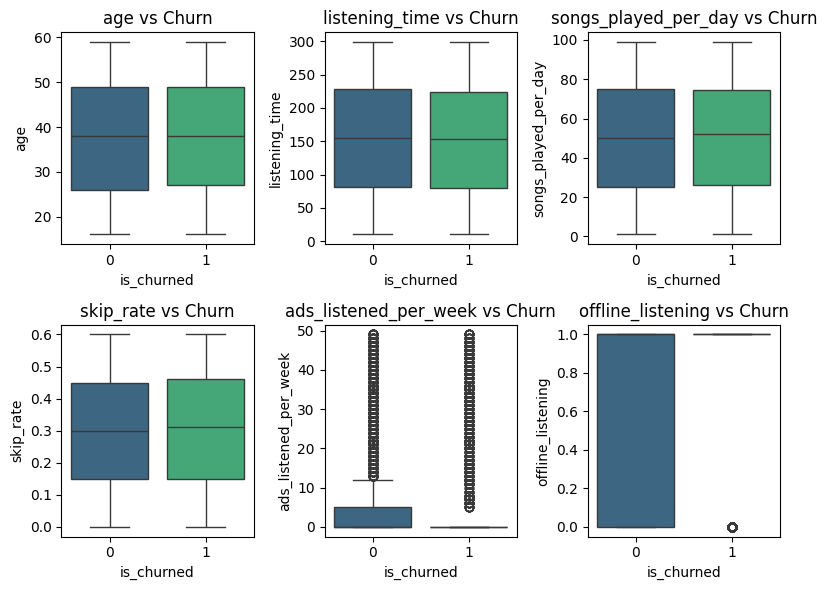

In [ ]:
# Box plots of numeric variables vs churn

numeric_columns = df.select_dtypes(include=np.number).drop(columns=['is_churned'])

# Calculate the number of rows and columns needed for subplots
n_cols = 3
n_rows = (len(numeric_columns.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(8, 6))

for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='is_churned', y=col, data=df, hue='is_churned', palette='viridis', legend=False)
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

Michelle:
1.   Most Spotify users are between **25 and 50 years old**.
2.   On average, users spend about **80 to 230 minutes listening per day**.
3.   Most users play **20 to 75 songs per day**.
4.   The **average skip rate is around 0.3** for both churned and non-churned users.
5.   Churned users tend to avoid ads, while non-churned users usually accept fewer **than 5 ads per week**.

The range of age churned was similar to the unchurned, indicating no particular range of age stood out in the churned users.  

The range of listening_time churned was similar to the unchurned, indicating no particular range of listening_time stood out in the churned users.

The range of song_play_per_day churned was similar to the unchurned, indicating no particular range of song_play_per_day stood out in the churned users.

The range of skip_rate churned was similar to the unchurned, indicating no particular range of skip_rate stood out in the churned users.

ads_listened_per_week vs Churn needed a further breaking down in bins and visualization, because there were many outliers.

offline_listending vs Churn also needed a better visualization, because they were both categorical variable in nature. The boxplot did not provided a justifiable comparison.

## Binning 'ads_listened_per_week'

In [84]:
# Define bin edges and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']

# Use pd.cut to create the binned column
df['ads_listened_per_week_binned'] = pd.cut(df['ads_listened_per_week'],
                                            bins=bins,
                                            labels=labels,
                                            right=False,
                                            include_lowest=True
                                            )

# Display the distribution of the new binned column
print(df['ads_listened_per_week_binned'].value_counts().sort_index())

ads_listened_per_week_binned
0-5      5982
6-10      204
11-15     222
16-20     234
21-25     198
26-30     217
31-35     222
36-40     245
41-45     243
46-50     233
Name: count, dtype: int64


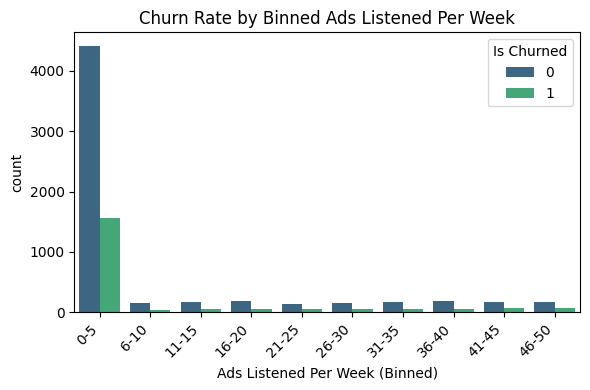

In [ ]:
# Count plot of binned 'ads_listened_per_week' vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='ads_listened_per_week_binned',
              data=df,
              hue='is_churned',
              palette='viridis'
              )
plt.title('Churn Rate by Binned Ads Listened Per Week')
plt.xlabel('Ads Listened Per Week (Binned)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Churned')
plt.tight_layout()
plt.show()

Michelle:


1.  The majority of users listen to **0–5 ads** per week, and this group includes most churned users.
2.  As the number of ads listened per week increases, the overall user count drops sharply.
3.  Churn remains more concentrated among users exposed to fewer ads, while higher ad counts are associated with fewer users overall.



Most of the users listened to 0-5 ads per week, but the proportions of churned users were similar across different bins of the ads_listen_per_week.

1/4 of users in each bins churned, indicating churning happened consistently in the similar proportion across different ranges of the ads_listen_per_week.   

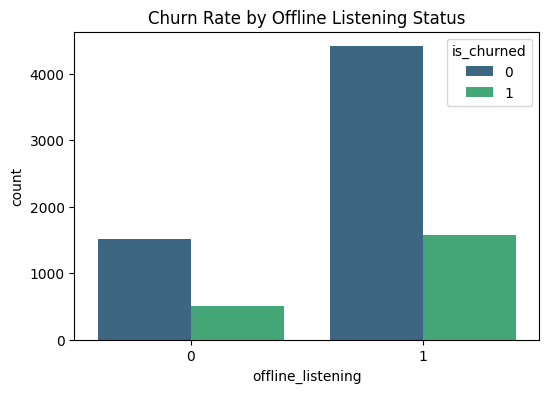

In [ ]:
# offline_listening vs Churn

plt.figure(figsize=(6, 4))
sns.countplot(x='offline_listening', data=df, hue='is_churned', palette='viridis')
plt.title('Churn Rate by Offline Listening Status')
plt.show()

is_churned
0    0.741125
1    0.258875
Name: proportion, dtype: float64


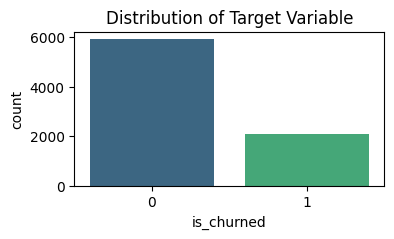

In [ ]:
# Distribution of the target variable
print(df['is_churned'].value_counts(normalize=True))

plt.figure(figsize=(4, 2)) # Michelle
sns.countplot(x='is_churned', data=df, hue='is_churned', palette='viridis', legend=False)
plt.title('Distribution of Target Variable')
plt.show()

Michelle:

The outcome variable shows class imbalance, with about 6,000 non-churned users compared to 2,000 churned users.

Churn rates were similar despite whether the users used the offline_listening function or not.

# Feature Engineering

In [ ]:
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,ads_listened_per_week_binned
0,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1,31-35
1,Other,33,DE,Family,141,62,0.34,Web,0,1,0,0-5
2,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1,0-5
3,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0,0-5
4,Other,29,US,Family,250,57,0.36,Mobile,0,1,1,0-5


In [ ]:
# Drop ad_listened_per_week_binned -  it might not be useful in the modelling process.

df = df.drop(columns=['ads_listened_per_week_binned'])


In [ ]:
# Change categorical variable data type to categorical

#df['offline_listening'] = df['offline_listening'].astype('category')
df['offline_listening'].astype('category')

,offline_listening
0,0
1,1
2,1
3,1
4,1
...,...
7995,1
7996,1
7997,0
7998,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8000 non-null   object  
 1   age                    8000 non-null   int64   
 2   country                8000 non-null   object  
 3   subscription_type      8000 non-null   object  
 4   listening_time         8000 non-null   int64   
 5   songs_played_per_day   8000 non-null   int64   
 6   skip_rate              8000 non-null   float64 
 7   device_type            8000 non-null   object  
 8   ads_listened_per_week  8000 non-null   int64   
 9   offline_listening      8000 non-null   category
 10  is_churned             8000 non-null   int64   
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 633.1+ KB


Changing offline_listening to categorical variable, because the nature of this variable was categorical.

Other categorical variables (gender, country, subscription_type, and device_type) were already in categorical/object data type.

# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image
Image('/content/drive/MyDrive/ADS505/Workflow: Data Partitioning.png')

In [ ]:
# Create the predictors (X) and outcome (y)

X = df.drop(columns=['is_churned'])
y = df['is_churned']

In [ ]:
# Split the dataset to get test dataset for performance measurements

X_prep, X_test, y_prep, y_test = train_test_split(
                                    X, y,
                                    test_size=0.2,
                                    random_state=42,
                                    stratify=y
)

In [ ]:
X_prep.shape, X_test.shape

Spliting dataset to obtain 20% test dataset as holdout for performance measurements, because 1600 records with around 25 parameters should be sufficient enough to get a general idea of model performance.

In [ ]:
# Split the dataset to get validation dataset for Cross-validation

X_train, X_valid, y_train, y_valid = train_test_split(X_prep, y_prep,
                                                      test_size=0.4,
                                                      random_state=42,
                                                      stratify=y_prep)

X_train.shape, X_valid.shape, X_test.shape

Further split the prep dataset to obtain 40% as validation dataset for model optimization, because this amount should be enough to train and validate models for optimization.  

In [ ]:
# Build proprocessing pipeline
numeric_preproc = Pipeline(steps=[
                            ("scaler", StandardScaler())
])

categorical_preproc = Pipeline(steps=[("ohe", OneHotEncoder(
                                          handle_unknown="ignore",
                                          sparse_output=False))
])

# Identify numerical and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

preprocess = ColumnTransformer(transformers=[
                              ("num", numeric_preproc, numeric_cols),
                              ("cat", categorical_preproc, categorical_cols),
    ],
                              remainder="passthrough"
)

Building preprocess pipeline to do normalization for numeric variables and one-hot encoding for categorical variables.

In [ ]:
# Fit preprocessing transformer to X_train

preprocess.fit(X_train)

# Apply preprocessing transformer to X_train, X_test and X_valid

X_train = preprocess.transform(X_train)
X_valid = preprocess.transform(X_valid)
X_test = preprocess.transform(X_test)

# Apply preprocessing transformer to X_prep for using functions w/
# internal cross-validation like LogisticRegressionCV

X_prep = preprocess.transform(X_prep)

In [ ]:
# Checking the # of columns

X_train.shape, X_valid.shape, X_test.shape, X_prep.shape

In [ ]:
# Checking the columns

print(preprocess.get_feature_names_out())

Applying the preprocessing to X_train, X_valid, and X_test, as well as X_prep.  

Now X_train and y_train are ready for model training, and X_valid and y_valid are ready for more manual model tuning and optimization through cross-validation.

X_prep and y_prep are more for using functions with internal cross-validation, like LogisticRegressionCV for model tuning and optimization.

X_test and y_test are ready for model performance measurements.

# Feature Selection

# Modeling

## 1. Baseline Logistic Regression (no optimization w/CV)

In [ ]:
# Drop some redundant categorical variables
# to prevent multilinearities in logistic regression

# Get the feature names after preprocessing
feature_names = preprocess.get_feature_names_out()

# Identify the indices of the columns to drop
columns_to_drop = ['cat__gender_Female',
                   'cat__country_AU',
                   'cat__subscription_type_Premium',
                   'cat__device_type_Desktop',
                   'cat__offline_listening_0']

# Ensure all columns to drop exist in the feature names
existing_columns_to_drop = [name for name in columns_to_drop
                            if name in feature_names]
drop_indices = [i for i, name in enumerate(feature_names)
                          if name in existing_columns_to_drop]

# Drop the columns by index from the NumPy arrays
X_train_lr = np.delete(X_train, drop_indices, axis=1)
X_valid_lr = np.delete(X_valid, drop_indices, axis=1)
X_test_lr = np.delete(X_test, drop_indices, axis=1)
X_prep_lr = np.delete(X_prep, drop_indices, axis=1)

# Build a simple logistic regression model

lr = LogisticRegression(max_iter=1000, random_state=42)

lr.fit(X_train_lr, y_train)

print("Train accuracy score:", lr.score(X_train_lr, y_train))
print("Test accuracy score:", lr.score(X_test_lr, y_test))

# Get predictions on the test set for model performance
y_pred_lr = lr.predict(X_test_lr)

# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix:\n", cm)

# Show detailed classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

The simple logistic regression had an okay accuracy rate of 0.74, but it failed to capture any churned cases as churned, resulting in 0% in sensitivity.

It classified all test records as nonchurned.

## 2. Optimizaed Logistic Regression (L1 penalty w/5 CV)

In [ ]:
# try an optimized logistic regression w/L1 penalty and 5 CV
# X_prep_lr and y_prep used for training and optimization, because
# logisticRegressionCV had a build-in internal Cross-validation function.

lr_opt = LogisticRegressionCV(penalty='l1',
                              solver='liblinear',
                              cv=5,
                              max_iter=1000,
                              random_state=42
)

lr_opt.fit(X_prep_lr, y_prep)

print("Train accuracy score:", lr_opt.score(X_prep_lr, y_prep))
print("Test accuracy score:", lr_opt.score(X_test_lr, y_test))

# Confusion matrix and Error rates for the simple logistic regression

# Get predictions on the test set for model performance
y_pred_lr = lr_opt.predict(X_test_lr)

# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

print("\nConfusion Matrix:\n", cm)

# Show detailed classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


There were no improvements on the accuracy and sensitivity in the optimized logistic regression model.

This was probably because linear model might not be able to detect more patterns in this dataset.

## Balance Logistic Regression

In [ ]:
# Michael

# Build a BALANCED logistic regression model
lr_balanced = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

lr_balanced.fit(X_train_lr, y_train)

print("Train accuracy score:", lr_balanced.score(X_train_lr, y_train))
print("Test accuracy score:", lr_balanced.score(X_test_lr, y_test))

# Confusion matrix and Error rates for the balanced logistic regression
# Get predictions on the test set for model performance
y_pred_lr = lr_balanced.predict(X_test_lr)

# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:\n", cm)

# Show detailed classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

## XGBOOST w/ SMOTE

In [ ]:
# MIchael
# Import SMOTE
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training set: {X_train.shape}")
print(f"Balanced training set after SMOTE: {X_train_balanced.shape}")
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

# Build XGBoost model (no scale_pos_weight needed since SMOTE balanced the data)
xgb_smote = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Train on SMOTE-balanced data
xgb_smote.fit(X_train_balanced, y_train_balanced)

print("\nTrain accuracy score:", xgb_smote.score(X_train_balanced, y_train_balanced))
print("Test accuracy score:", xgb_smote.score(X_test, y_test))

# Confusion matrix and Error rates
# Get predictions on the test set for model performance
y_pred_xgb = xgb_smote.predict(X_test)

# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", cm)

# Show detailed classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

## XGBoost w/ Scale

In [ ]:
#Michael

# Build XGBoost model with scale_pos_weight for class imbalance
xgb = XGBClassifier(
    scale_pos_weight=3,
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Train on original (unbalanced) data
xgb.fit(X_train, y_train)

print("Train accuracy score:", xgb.score(X_train, y_train))
print("Test accuracy score:", xgb.score(X_test, y_test))

# Confusion matrix and Error rates
# Get predictions on the test set for model performance
y_pred_xgb = xgb.predict(X_test)

# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", cm)

# Show detailed classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Result & Evaluation